In [29]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import regex as re
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import RandomOverSampler
from sklearn.utils import resample
from sklearn.ensemble import RandomForestClassifier





In [30]:
data = pd.read_csv('Calabar Municipal, Nigeria Weather History _ Weather Underground.csv')

In [31]:
data

,Time,Temperature,DewPoint,Humidity,Wind,WindSpeed,WindGust,Pressure,Precip\.,Condition
0,12:00 AM,75,73,94,VAR,1,0,29.83,0.0,Fair
1,1:00 AM,75,73,94,WSW,3,0,29.80,0.0,Fair
2,2:00 AM,75,73,94,WSW,3,0,29.80,0.0,Fair
3,3:00 AM,75,73,94,WSW,2,0,29.80,0.0,Fair
4,4:00 AM,75,73,94,SSW,3,0,29.80,0.0,Fair
...,...,...,...,...,...,...,...,...,...,...
7989,5:00 PM,86,77,74,W,7,0,29.74,0.0,Partly Cloudy
7990,6:00 PM,82,79,89,WSW,6,0,29.74,0.0,Partly Cloudy
7991,7:00 PM,82,79,89,WSW,8,0,29.77,0.0,Partly Cloudy
7992,8:00 PM,81,77,89,W,8,0,29.77,0.0,Fair


In [32]:
# Replace empty strings and special characters with NaN in the 'Time' column
data['Time'] = data['Time'].replace('', np.nan)
data['Time'] = data['Time'].replace(r'^\ufeff.*$', np.nan, regex=True)
data = data.drop(data[data['Temperature'] == 'Temperature'].index)
data.dropna(inplace=True)

In [33]:
# data[['Temperature','DewPoint','Humidity','WindSpeed', 'Pressure']] = data[['Temperature','DewPoint','Humidity','WindSpeed','Pressure']].astype(float)

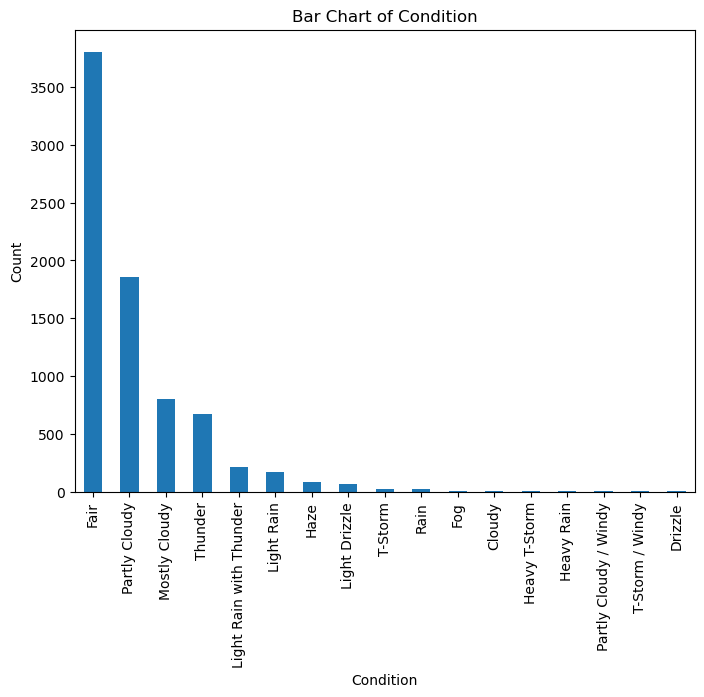

In [34]:
unique_counts = data['Condition'].value_counts()

# Mengatur ukuran figure
plt.figure(figsize=(8, 6))

# Membuat bar chart
unique_counts.plot(kind='bar')

# Memberikan judul pada chart
plt.title('Bar Chart of Condition')

# Memberikan label sumbu x dan y
plt.xlabel('Condition')
plt.ylabel('Count')

# Menampilkan chart
plt.show()

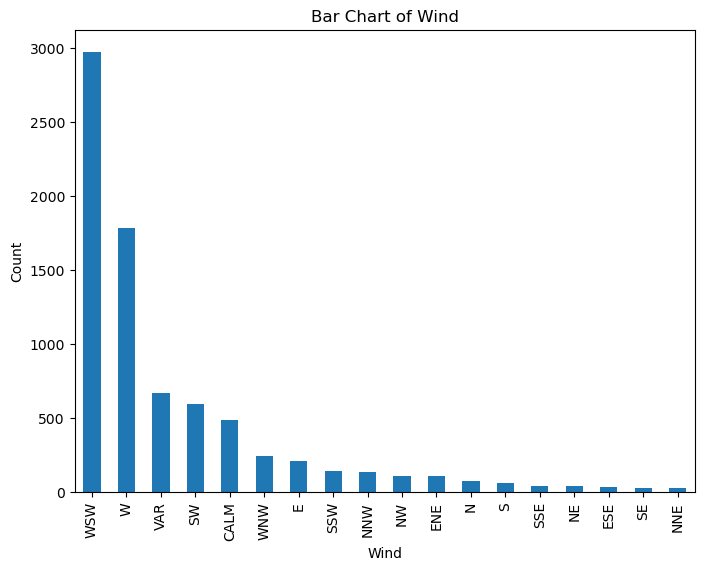

In [35]:
unique_counts = data['Wind'].value_counts()

# Mengatur ukuran figure
plt.figure(figsize=(8, 6))

# Membuat bar chart
unique_counts.plot(kind='bar')

# Memberikan judul pada chart
plt.title('Bar Chart of Wind')

# Memberikan label sumbu x dan y
plt.xlabel('Wind')
plt.ylabel('Count')

# Menampilkan chart
plt.show()

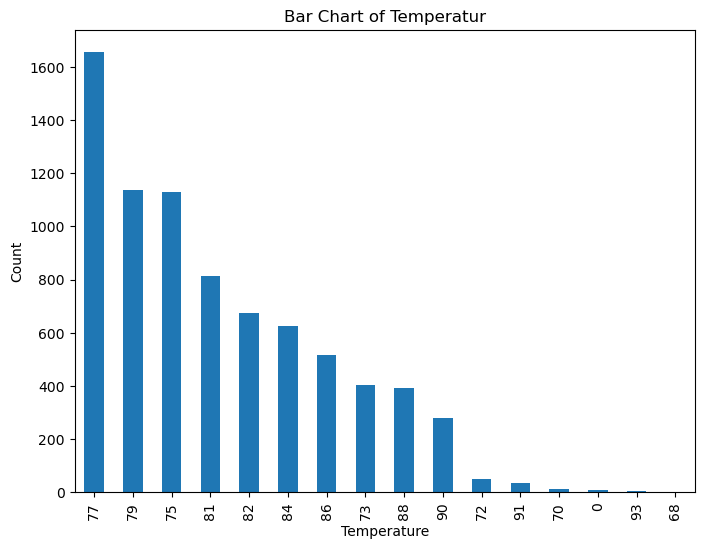

In [36]:
unique_counts = data['Temperature'].value_counts()

# Mengatur ukuran figure
plt.figure(figsize=(8, 6))

# Membuat bar chart
unique_counts.plot(kind='bar')

# Memberikan judul pada chart
plt.title('Bar Chart of Temperatur')

# Memberikan label sumbu x dan y
plt.xlabel('Temperature')
plt.ylabel('Count')

# Menampilkan chart
plt.show()


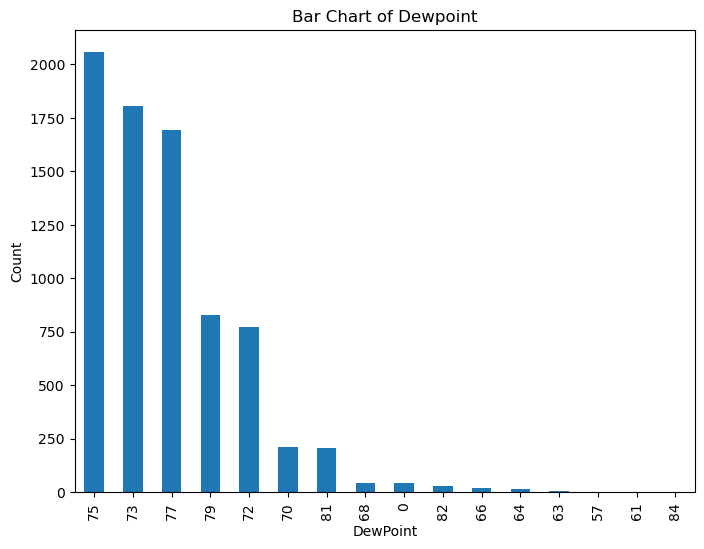

In [37]:
unique_counts = data['DewPoint'].value_counts()

# Mengatur ukuran figure
plt.figure(figsize=(8, 6))

# Membuat bar chart
unique_counts.plot(kind='bar')

# Memberikan judul pada chart
plt.title('Bar Chart of Dewpoint')

# Memberikan label sumbu x dan y
plt.xlabel('DewPoint')
plt.ylabel('Count')

# Menampilkan chart
plt.show()

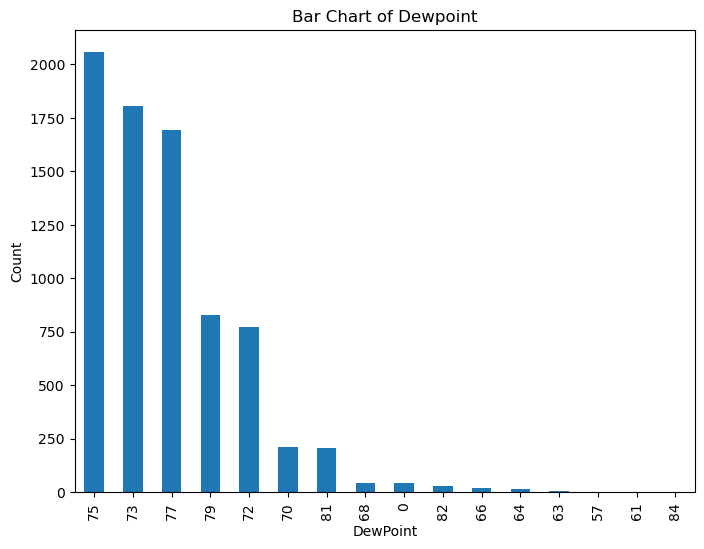

In [38]:
unique_counts = data['DewPoint'].value_counts()

# Mengatur ukuran figure
plt.figure(figsize=(8, 6))

# Membuat bar chart
unique_counts.plot(kind='bar')

# Memberikan judul pada chart
plt.title('Bar Chart of Dewpoint')

# Memberikan label sumbu x dan y
plt.xlabel('DewPoint')
plt.ylabel('Count')

# Menampilkan chart
plt.show()


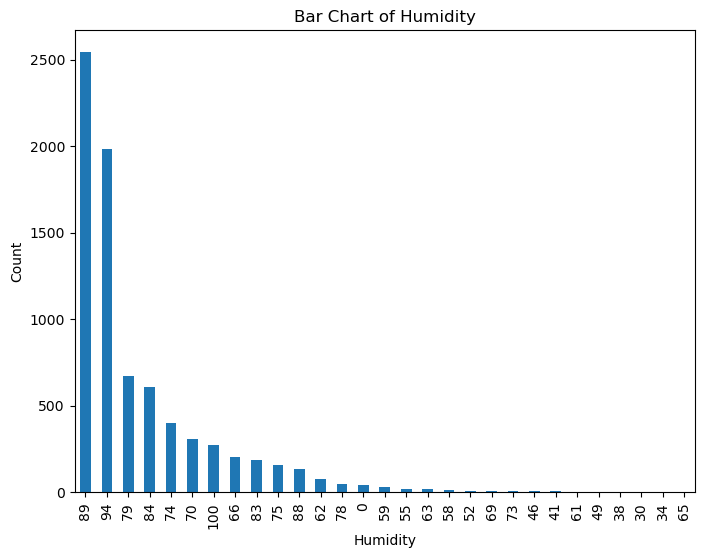

In [39]:
unique_counts = data['Humidity'].value_counts()

# Mengatur ukuran figure
plt.figure(figsize=(8, 6))

# Membuat bar chart
unique_counts.plot(kind='bar')

# Memberikan judul pada chart
plt.title('Bar Chart of Humidity')

# Memberikan label sumbu x dan y
plt.xlabel('Humidity')
plt.ylabel('Count')

# Menampilkan chart
plt.show()

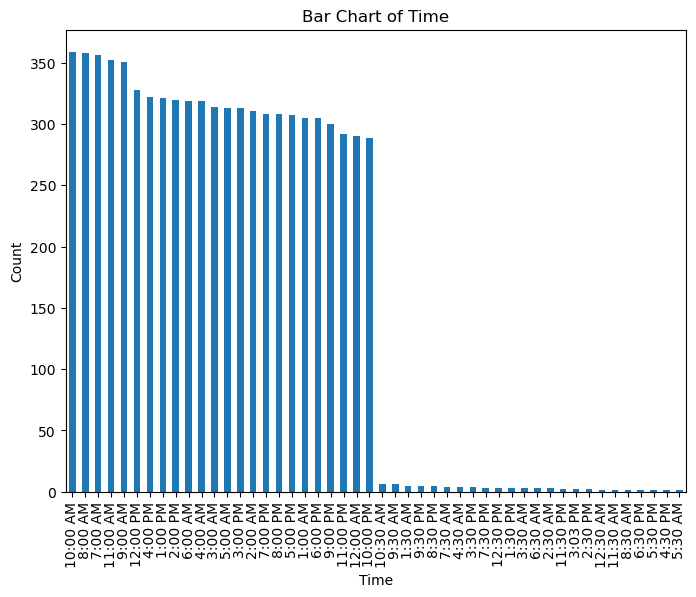

In [40]:
unique_counts = data['Time'].value_counts()

# Mengatur ukuran figure
plt.figure(figsize=(8, 6))

# Membuat bar chart
unique_counts.plot(kind='bar')

# Memberikan judul pada chart
plt.title('Bar Chart of Time')

# Memberikan label sumbu x dan y
plt.xlabel('Time')
plt.ylabel('Count')

# Menampilkan chart
plt.show()


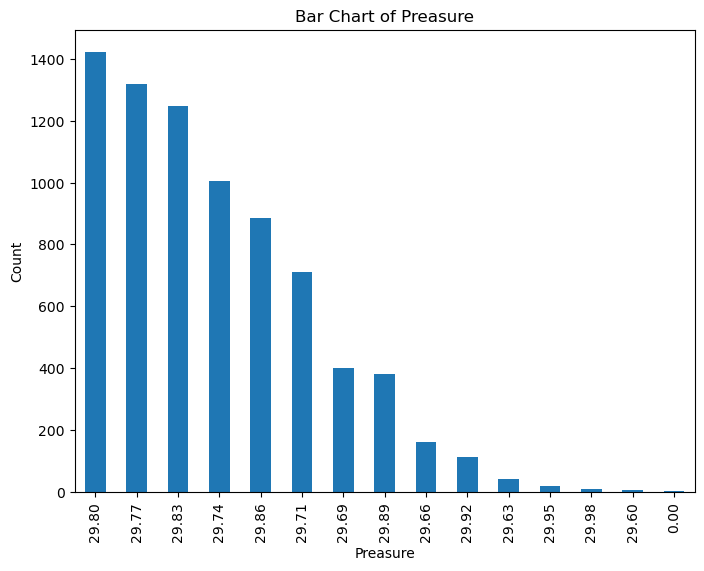

In [41]:
unique_counts = data['Pressure'].value_counts()

# Mengatur ukuran figure
plt.figure(figsize=(8, 6))

# Membuat bar chart
unique_counts.plot(kind='bar')

# Memberikan judul pada chart
plt.title('Bar Chart of Preasure')

# Memberikan label sumbu x dan y
plt.xlabel('Preasure')
plt.ylabel('Count')

# Menampilkan chart
plt.show()

In [42]:
data

,Time,Temperature,DewPoint,Humidity,Wind,WindSpeed,WindGust,Pressure,Precip\.,Condition
0,12:00 AM,75,73,94,VAR,1,0,29.83,0.0,Fair
1,1:00 AM,75,73,94,WSW,3,0,29.80,0.0,Fair
2,2:00 AM,75,73,94,WSW,3,0,29.80,0.0,Fair
3,3:00 AM,75,73,94,WSW,2,0,29.80,0.0,Fair
4,4:00 AM,75,73,94,SSW,3,0,29.80,0.0,Fair
...,...,...,...,...,...,...,...,...,...,...
7989,5:00 PM,86,77,74,W,7,0,29.74,0.0,Partly Cloudy
7990,6:00 PM,82,79,89,WSW,6,0,29.74,0.0,Partly Cloudy
7991,7:00 PM,82,79,89,WSW,8,0,29.77,0.0,Partly Cloudy
7992,8:00 PM,81,77,89,W,8,0,29.77,0.0,Fair


In [43]:
categorical_features = ['Wind']
data = pd.get_dummies(data, columns=categorical_features)

In [44]:
encoder = LabelEncoder()

special_mapping = {
    'Fair':0,
    'Mostly Cloudy':1, 
    'Thunder':2,
    'Partly Cloudy':3,
    'Haze':4,
    'Fog':5,
    'Condition':6,
    'Light Rain with Thunder':7,
    'Light Rain':7,
    'Partly Cloudy / Windy':8,
    'T-Storm':9, 
    'Heavy T-Storm':10,
    'T-Storm / Windy':11,
    'Rain':12, 
    'Light Drizzle':13,
    'Cloudy':14,
    'Heavy Rain':15,
    'Drizzle':16
}


data['Condition'] = data['Condition'].map(special_mapping).fillna(data['Condition'])

# encoded_df.drop('Condition',axis=1)

In [45]:
data.head(10)

,Time,Temperature,DewPoint,Humidity,WindSpeed,WindGust,Pressure,Precip\.,Condition,Wind_CALM,...,Wind_NW,Wind_S,Wind_SE,Wind_SSE,Wind_SSW,Wind_SW,Wind_VAR,Wind_W,Wind_WNW,Wind_WSW
0,12:00 AM,75,73,94,1,0,29.83,0.0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,1:00 AM,75,73,94,3,0,29.80,0.0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,2:00 AM,75,73,94,3,0,29.80,0.0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,3:00 AM,75,73,94,2,0,29.80,0.0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,4:00 AM,75,73,94,3,0,29.80,0.0,0,0,...,0,0,0,0,1,0,0,0,0,0
6,6:00 AM,75,73,94,0,0,29.80,0.0,0,1,...,0,0,0,0,0,0,0,0,0,0
7,7:00 AM,73,72,94,2,0,29.80,0.0,1,0,...,0,0,0,0,0,0,1,0,0,0
8,8:00 AM,77,73,89,1,0,29.83,0.0,2,0,...,0,0,0,0,0,0,1,0,0,0
9,9:00 AM,84,81,89,2,0,29.86,0.0,0,0,...,0,0,0,0,0,0,1,0,0,0
10,10:00 AM,84,75,74,7,0,29.86,0.0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7730 entries, 0 to 7993
Data columns (total 27 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Time         7730 non-null   object
 1   Temperature  7730 non-null   object
 2   DewPoint     7730 non-null   object
 3   Humidity     7730 non-null   object
 4   WindSpeed    7730 non-null   object
 5   WindGust     7730 non-null   object
 6   Pressure     7730 non-null   object
 7   Precip\.     7730 non-null   object
 8   Condition    7730 non-null   int64 
 9   Wind_CALM    7730 non-null   uint8 
 10  Wind_E       7730 non-null   uint8 
 11  Wind_ENE     7730 non-null   uint8 
 12  Wind_ESE     7730 non-null   uint8 
 13  Wind_N       7730 non-null   uint8 
 14  Wind_NE      7730 non-null   uint8 
 15  Wind_NNE     7730 non-null   uint8 
 16  Wind_NNW     7730 non-null   uint8 
 17  Wind_NW      7730 non-null   uint8 
 18  Wind_S       7730 non-null   uint8 
 19  Wind_SE      7730 non-null 

In [47]:
# Convert the 'Time' column to numerical values
time_encoder = LabelEncoder()
data['Time'] = time_encoder.fit_transform(data['Time'])

# Convert all columns to numeric type except for the 'Time' column
numeric_columns = ['Temperature', 'DewPoint', 'Humidity', 'WindSpeed', 'WindGust', 'Pressure', 'Precip\.']
data[numeric_columns] = data[numeric_columns].apply(pd.to_numeric, errors='coerce')

data.dropna(inplace=True)

In [48]:

# Split the data into training and testing sets
features = data.drop('Condition',axis=1)  # Exclude the target variable
target = data['Condition']

ros = RandomOverSampler(random_state=0)
X, y = ros.fit_resample(features, target)

encoder = LabelEncoder()
y = encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [70]:
print(y)

[ 0  0  0 ... 15 15 15]


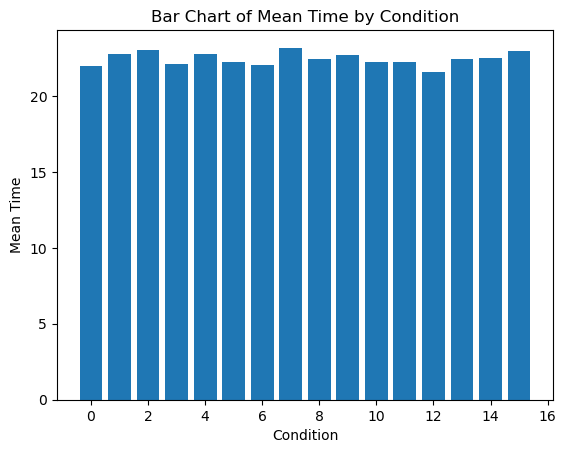

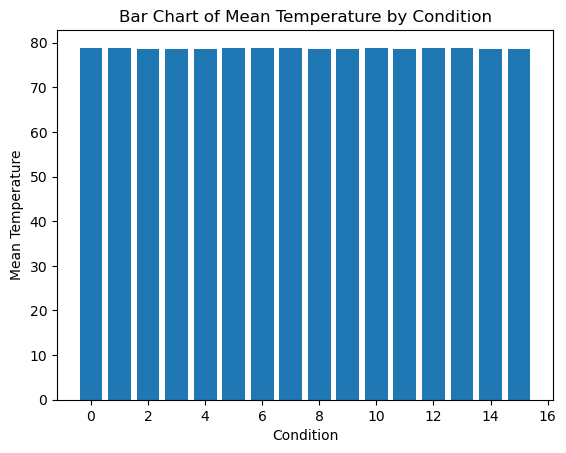

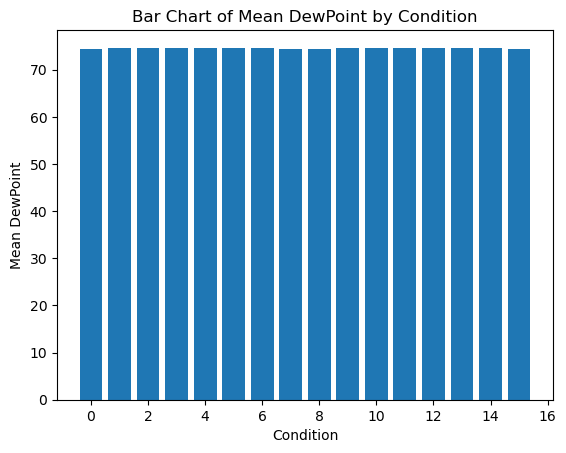

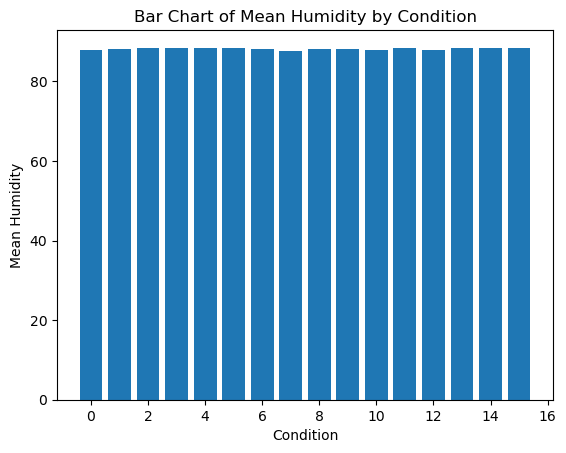

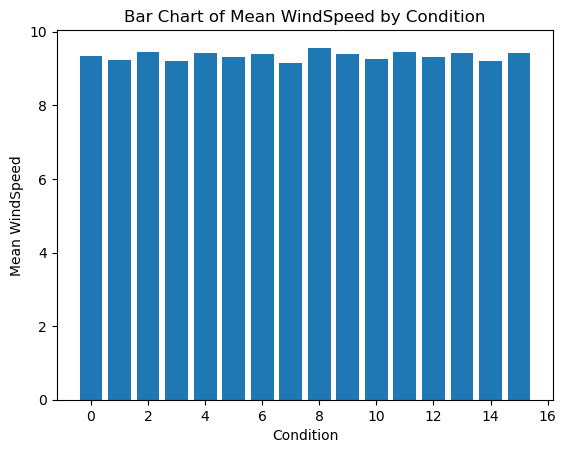

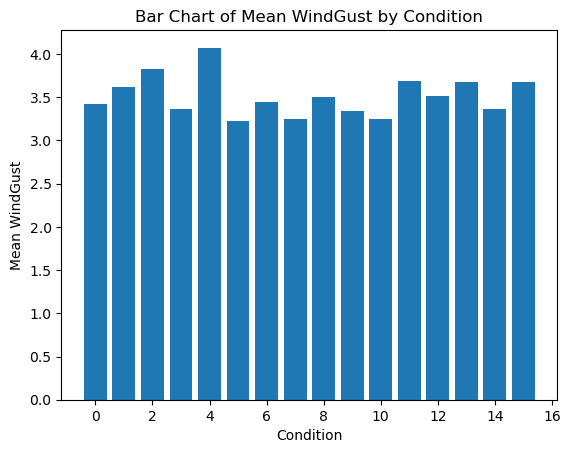

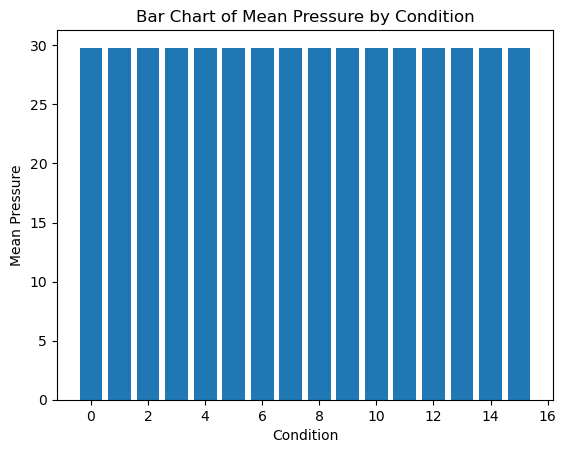

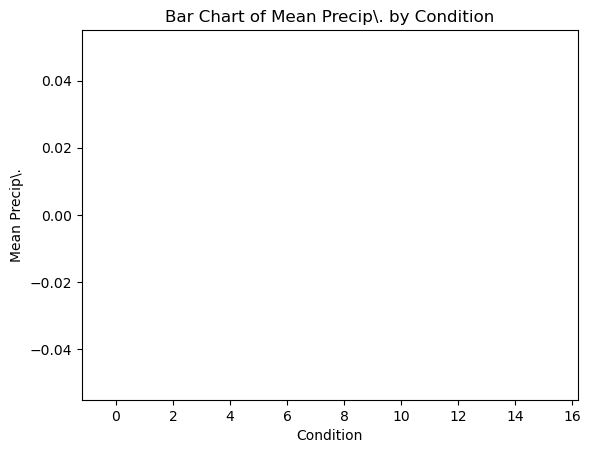

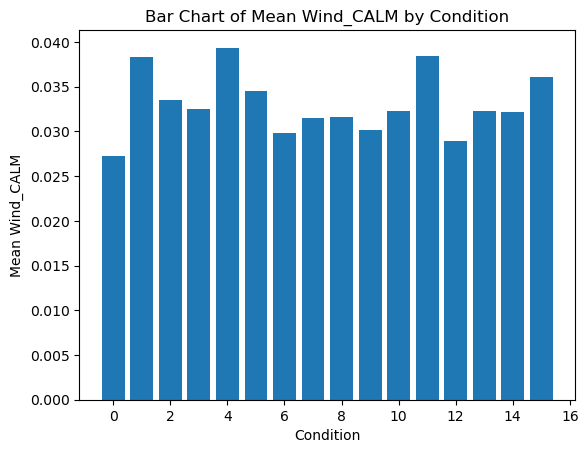

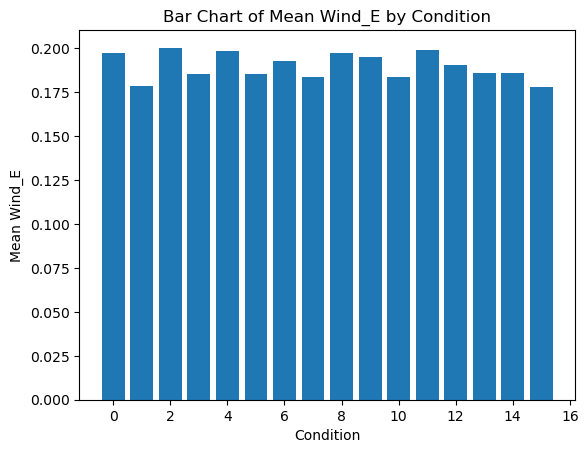

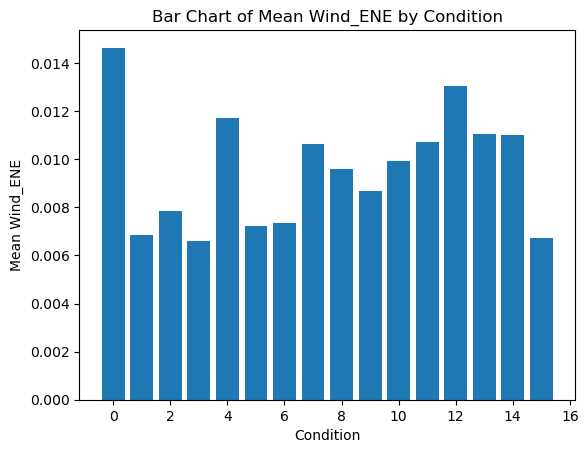

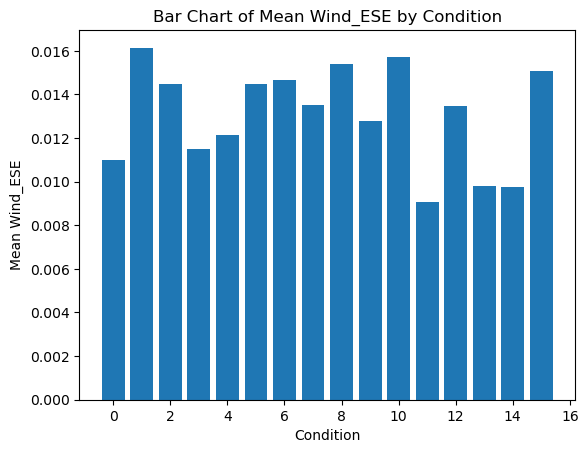

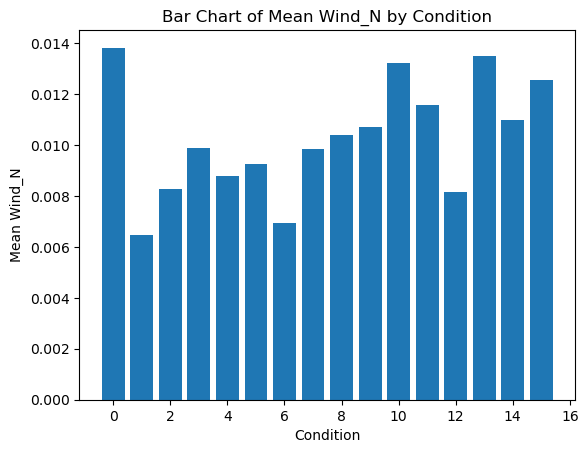

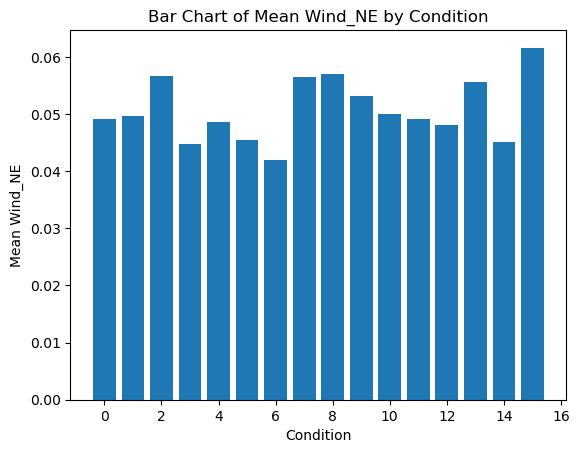

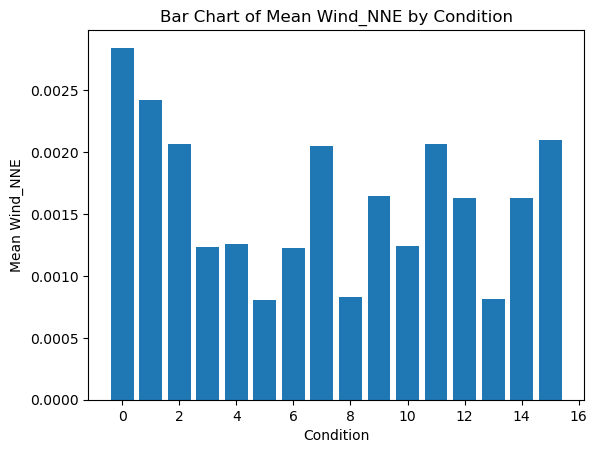

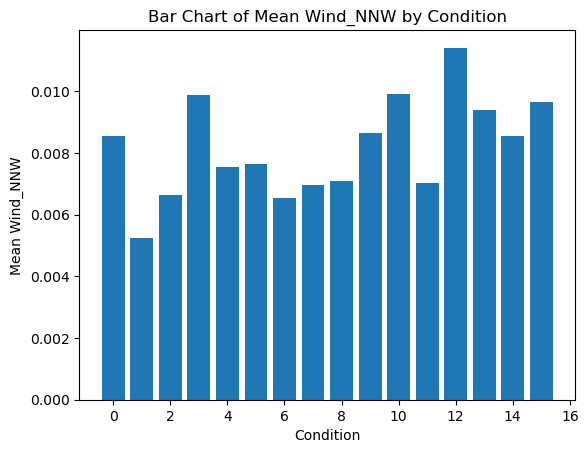

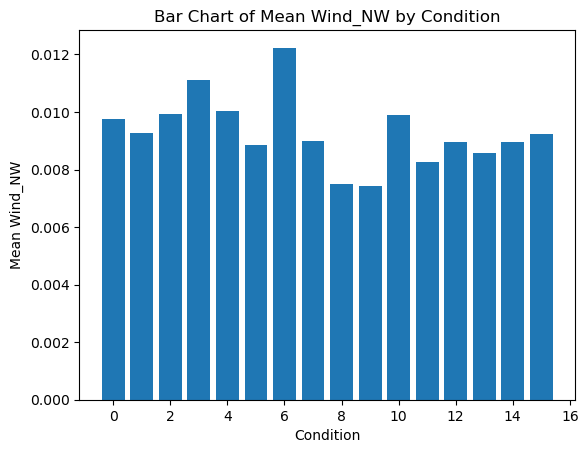

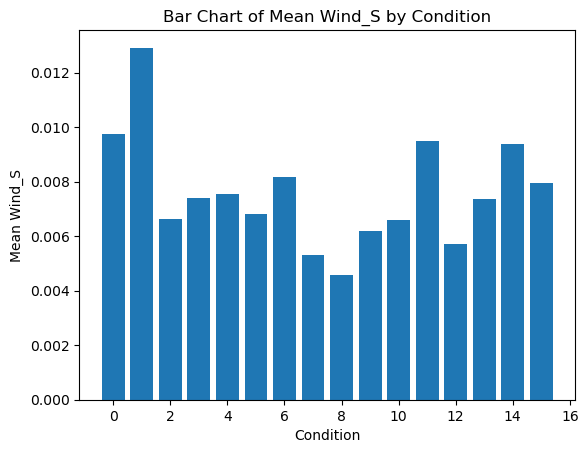

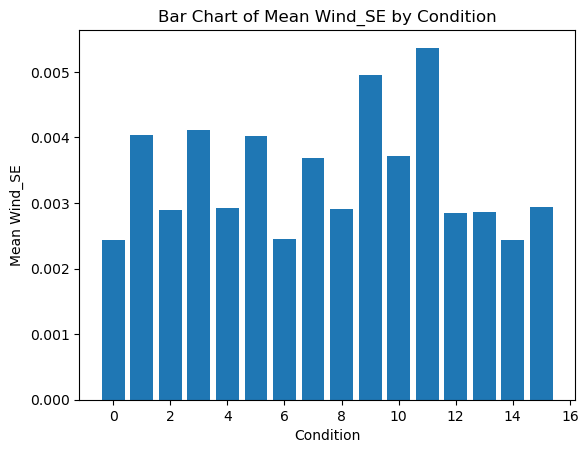

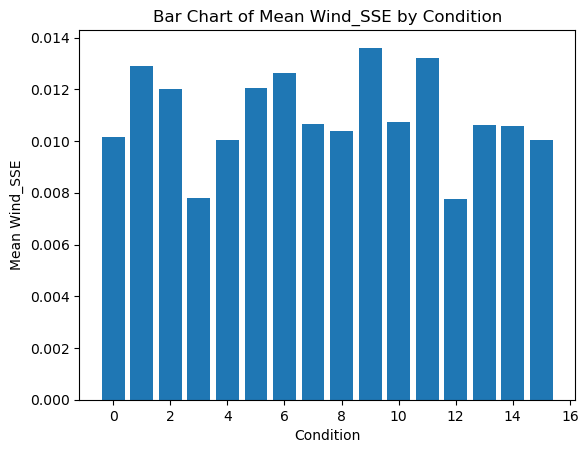

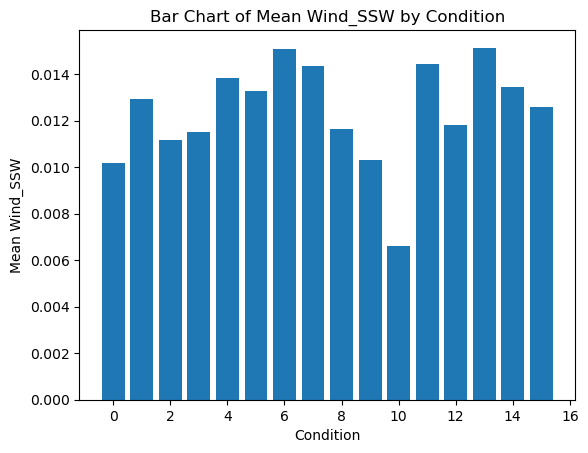

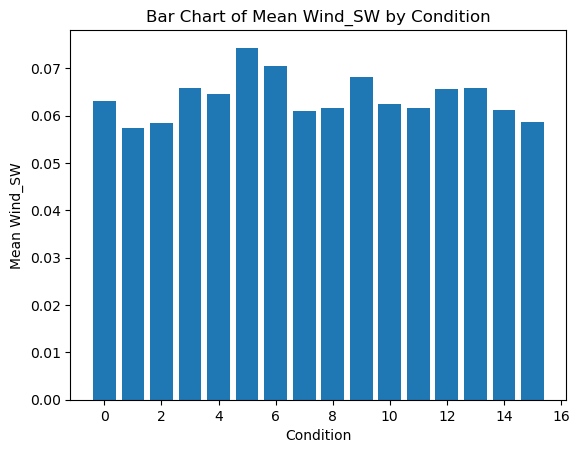

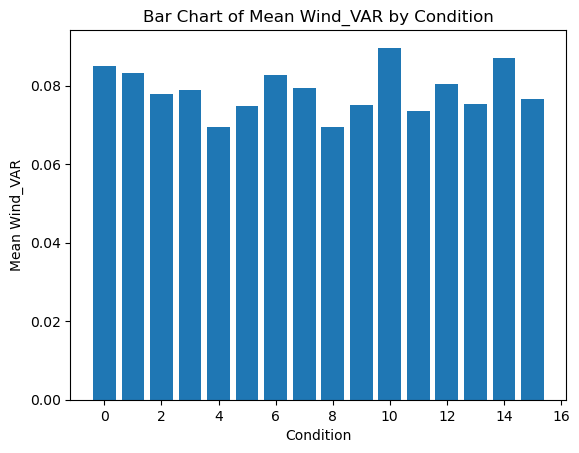

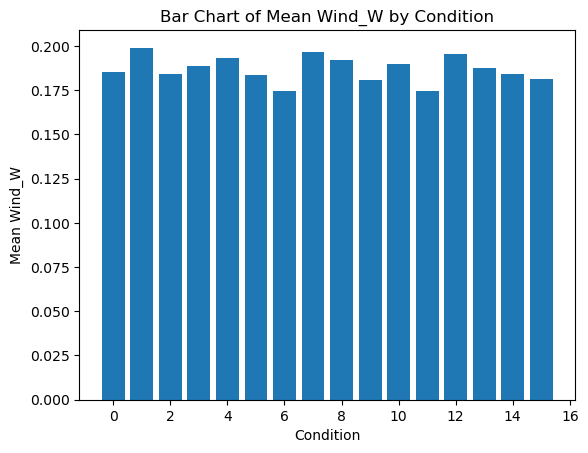

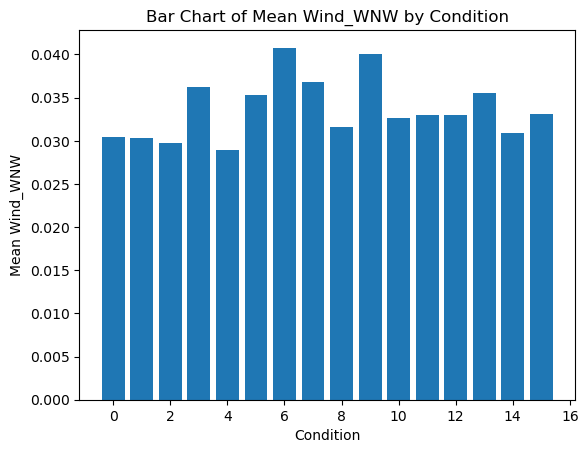

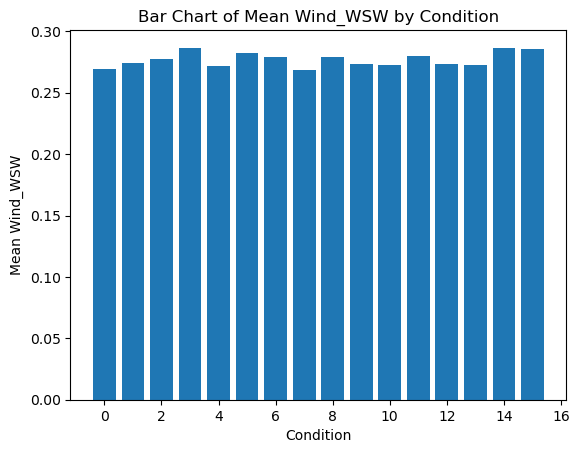

In [71]:
import matplotlib.pyplot as plt

# Concatenate the features and target into a single DataFrame
df = pd.concat([pd.DataFrame(X_train, columns=features.columns), pd.DataFrame(y_train, columns=['Condition'])], axis=1)

# Calculate the mean value of each feature grouped by the target variable
feature_means = df.groupby('Condition').mean()

# Plot the bar chart for each feature
for feature in feature_means.columns:
    plt.figure()
    plt.bar(feature_means.index, feature_means[feature])
    plt.xlabel('Condition')
    plt.ylabel('Mean ' + feature)
    plt.title('Bar Chart of Mean ' + feature + ' by Condition')
    plt.show()

In [73]:
unique_values = np.unique(y, axis=None)

# Print the unique values
print(unique_values)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]


In [74]:
target.unique()

array([ 0,  1,  2,  3,  4,  5,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16],
      dtype=int64)

In [79]:
value_counts = df['Condition'].value_counts()
# Print the count of each unique value
print(value_counts)

5.0     3095
14.0    3074
1.0     3068
2.0     3065
3.0     3055
8.0     3053
11.0    3048
13.0    3047
10.0    3044
6.0     3041
12.0    3039
0.0     3028
15.0    3022
7.0     3019
4.0     3018
9.0     3013
Name: Condition, dtype: int64


In [80]:
unique_values, counts = np.unique(y, return_counts=True)

# Display the unique values and their counts
for value, count in zip(unique_values, counts):
    print(f"{value}:{count}")

0:3807
1:3807
2:3807
3:3807
4:3807
5:3807
6:3807
7:3807
8:3807
9:3807
10:3807
11:3807
12:3807
13:3807
14:3807
15:3807


In [49]:
# KNN classification
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_predictions = knn.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_predictions)
print("KNN Accuracy:", knn_accuracy)

KNN Accuracy: 0.922843306246409


In [50]:
from sklearn.metrics import classification_report

In [51]:
print("Classification Report KNN:\n")
print(classification_report(y_test,knn_predictions ))

Classification Report KNN:

              precision    recall  f1-score   support

           0       0.68      0.45      0.54       779
           1       0.77      0.86      0.81       739
           2       0.75      0.91      0.82       742
           3       0.67      0.58      0.62       752
           4       0.97      1.00      0.99       789
           5       0.99      1.00      1.00       712
           6       0.90      0.97      0.94       766
           7       1.00      1.00      1.00       788
           8       1.00      1.00      1.00       754
           9       1.00      1.00      1.00       794
          10       0.99      1.00      1.00       763
          11       1.00      1.00      1.00       759
          12       0.98      0.99      0.99       768
          13       0.99      1.00      0.99       760
          14       1.00      1.00      1.00       733
          15       0.99      1.00      1.00       785

    accuracy                           0.92     1218

In [52]:
rf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)

# Melatih model Random Forest
rf.fit(X_train, y_train)

# Memprediksi pada data uji menggunakan model Random Forest
rf_predictions = rf.predict(X_test)

# Menghitung akurasi model Random Forest 
rf_accuracy = accuracy_score(y_test, rf_predictions)
print("Random Forest Accuracy:", rf_accuracy)


Random Forest Accuracy: 0.6741360912747271


In [53]:
print("Classification Report RandomForest:\n")
print(classification_report(y_test,rf_predictions))

Classification Report RandomForest:

              precision    recall  f1-score   support

           0       0.41      0.08      0.13       779
           1       0.27      0.30      0.28       739
           2       0.30      0.38      0.33       742
           3       0.43      0.18      0.26       752
           4       0.69      0.92      0.79       789
           5       0.56      1.00      0.72       712
           6       0.38      0.08      0.14       766
           7       1.00      1.00      1.00       788
           8       0.83      0.88      0.85       754
           9       0.87      1.00      0.93       794
          10       1.00      1.00      1.00       763
          11       0.66      0.69      0.67       759
          12       0.54      0.26      0.35       768
          13       0.68      1.00      0.81       760
          14       0.97      1.00      0.98       733
          15       0.67      1.00      0.80       785

    accuracy                           0.67

In [54]:
xgb_classifier = xgb.XGBClassifier()
xgb_classifier.fit(X_train, y_train)

y_pred = xgb_classifier.predict(X_test)

class_labels = np.unique(y)
classification_rep = classification_report(y_test, y_pred, labels=class_labels)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy XGB:", accuracy)

Accuracy XGB: 0.9283427727160798


In [55]:
print("Classification Report XGB:\n")
print(classification_rep)

Classification Report XGB:

              precision    recall  f1-score   support

           0       0.73      0.61      0.66       779
           1       0.74      0.80      0.77       739
           2       0.78      0.88      0.83       742
           3       0.70      0.60      0.65       752
           4       0.99      1.00      1.00       789
           5       1.00      1.00      1.00       712
           6       0.89      0.96      0.92       766
           7       1.00      1.00      1.00       788
           8       1.00      1.00      1.00       754
           9       1.00      1.00      1.00       794
          10       1.00      1.00      1.00       763
          11       1.00      1.00      1.00       759
          12       0.98      0.99      0.99       768
          13       0.99      1.00      0.99       760
          14       1.00      1.00      1.00       733
          15       0.99      1.00      1.00       785

    accuracy                           0.93     1218

In [56]:
class_weights = {0: 1, 1: 5, 9: 3, 14: 2, 15: 1, 12: 1, 8: 1, 6: 1, 7: 1, 4: 1, 5: 1, 10:1, 13:1, 11:1, 3:1,2:1}

 # Adjust the weights according to your specific class imbalance

# Train the XGBoost classifier with weight adjustment
xgb_classifier.fit(X_train, y_train, sample_weight=[class_weights[i] for i in y_train])

# Make predictions on the test set
y_pred = xgb_classifier.predict(X_test)

# Generate the classification report
class_labels = np.unique(y)
classification_rep = classification_report(y_test, y_pred, labels=class_labels)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("Classification Report:")
print(classification_rep)

Accuracy: 0.9175900845440368
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.56      0.65       779
           1       0.56      0.99      0.72       739
           2       0.80      0.79      0.80       742
           3       0.79      0.46      0.58       752
           4       1.00      1.00      1.00       789
           5       1.00      1.00      1.00       712
           6       0.93      0.89      0.91       766
           7       1.00      1.00      1.00       788
           8       1.00      1.00      1.00       754
           9       1.00      1.00      1.00       794
          10       1.00      1.00      1.00       763
          11       1.00      1.00      1.00       759
          12       0.99      0.99      0.99       768
          13       0.99      1.00      0.99       760
          14       1.00      1.00      1.00       733
          15       0.99      1.00      1.00       785

    accuracy                

In [57]:
import numpy as np

unique_classes = np.unique(y_test)
print(unique_classes)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]


In [58]:
import numpy as np

unique_classes = np.unique(y_train)
print(unique_classes)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]


In [59]:
# # Menyiapkan data latih dan data uji
# X_train, X_test, y_train, y_test = train_test_split(data[features], data[target], test_size=0.2, random_state=42)

# # Menyeimbangkan data latih dengan oversampling pada kelas minoritas
# X_train_balanced, y_train_balanced = resample(X_train[y_train == 1], y_train[y_train == 1],
#                                               n_samples=X_train[y_train == 0].shape[0], random_state=42)
# X_train_balanced = np.concatenate((X_train[y_train == 0], X_train_balanced))
# y_train_balanced = np.concatenate((y_train[y_train == 0], y_train_balanced))

# # Membuat objek model Random Forest dengan penanganan data tidak seimbang
# rf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42, class_weight='balanced')

# # Melatih model Random Forest dengan data yang telah seimbang
# rf.fit(X_train_balanced, y_train_balanced)

# # Memprediksi pada data uji
# rf_predictions = rf.predict(X_test)

# # Menghitung metrik evaluasi
# rf_accuracy = accuracy_score(y_test, rf_predictions)
# rf_precision = precision_score(y_test, rf_predictions)
# rf_recall = recall_score(y_test, rf_predictions)
# rf_f1 = f1_score(y_test, rf_predictions)

# # Menampilkan hasil evaluasi
# print("Random Forest Accuracy:", rf_accuracy)
# print("Random Forest Precision:", rf_precision)
# print("Random Forest Recall:", rf_recall)
# print("Random Forest F1-score:", rf_f1)


In [60]:
# print(classification_report(y_test,xgb_predictions ))

In [61]:
# # Menyiapkan data latih dan data uji
# X_train, X_test, y_train, y_test = train_test_split(data[features], data[target], test_size=0.2, random_state=42)

# # Menyeimbangkan data latih dengan oversampling pada kelas minoritas
# oversampler = RandomOverSampler(random_state=42)
# X_train_balanced, y_train_balanced = oversampler.fit_resample(X_train, y_train)

# # Membuat objek model KNN dengan penanganan data tidak seimbang
# knn = KNeighborsClassifier(n_neighbors=5, weights='distance')

# # Melatih model KNN dengan data yang telah seimbang
# knn.fit(X_train_balanced, y_train_balanced)

# # Memprediksi pada data uji
# knn_predictions = knn.predict(X_test)

# # Menghitung metrik evaluasi
# knn_accuracy = accuracy_score(y_test, knn_predictions)
# knn_precision = precision_score(y_test, knn_predictions)
# knn_recall = recall_score(y_test, knn_predictions)
# knn_f1 = f1_score(y_test, knn_predictions)

# # Menampilkan hasil evaluasi
# print("KNN Accuracy:", knn_accuracy)
# print("KNN Precision:", knn_precision)
# print("KNN Recall:", knn_recall)
# print("KNN F1-score:", knn_f1)




In [62]:
# # Menyiapkan data latih dan data uji
# X_train, X_test, y_train, y_test = train_test_split(data[features], data[target], test_size=0.2, random_state=42)

# # Menyeimbangkan data latih dengan oversampling pada kelas minoritas
# X_train_balanced, y_train_balanced = resample(X_train[y_train == 1], y_train[y_train == 1],
#                                               n_samples=X_train[y_train == 0].shape[0], random_state=42)
# X_train_balanced = np.concatenate((X_train[y_train == 0], X_train_balanced))
# y_train_balanced = np.concatenate((y_train[y_train == 0], y_train_balanced))

# # Membuat objek model XGBoost dengan penanganan data tidak seimbang
# xgb = XGBClassifier(n_estimators=100, max_depth=5, random_state=42, scale_pos_weight=len(y_train[y_train == 0]) / len(y_train[y_train == 1]))

# # Melatih model XGBoost dengan data yang telah seimbang
# xgb.fit(X_train_balanced, y_train_balanced)

# # Memprediksi pada data uji
# xgb_predictions = xgb.predict(X_test)

# # Menghitung metrik evaluasi
# xgb_accuracy = accuracy_score(y_test, xgb_predictions)
# xgb_precision = precision_score(y_test, xgb_predictions)
# xgb_recall = recall_score(y_test, xgb_predictions)
# xgb_f1 = f1_score(y_test, xgb_predictions)

# # Menampilkan hasil evaluasi
# print("XGBoost Accuracy:", xgb_accuracy)
# print("XGBoost Precision:", xgb_precision)
# print("XGBoost Recall:", xgb_recall)
# print("XGBoost F1-score:", xgb_f1)


In [63]:
# from sklearn.metrics import accuracy_score
# from sklearn.model_selection import GridSearchCV

# # Define the parameter grid for hyperparameter tuning
# param_grid = {
#     'n_estimators': [100, 200, 300],  # Number of trees
#     'max_depth': [3, 4, 5],  # Maximum depth of each tree
#     'learning_rate': [0.01, 0.1, 0.2],  # Learning rate
#     'gamma': [0, 0.1, 0.2],  # Minimum loss reduction required to make a further partition on a leaf node
#     'reg_alpha': [0, 0.1, 0.2],  # L1 regularization term on weights
#     'reg_lambda': [0, 0.1, 0.2]  # L2 regularization term on weights
# }

# # SAya aidityas adhakim setuju untuk membuka rekening di bank bri
# # untuk saya pribadi dan tidak akan saya pindah tangankanh

# # Create an XGBoost classifier object
# xgb = XGBClassifier(random_state=42)

# # Perform grid search cross-validation
# grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5, scoring='accuracy')
# grid_search.fit(X_train, y_train)

# # Get the best parameters and model
# best_params = grid_search.best_params_
# best_model = grid_search.best_estimator_

# # Print the best parameters
# print("Best Parameters:", best_params)

# # Evaluate the best model on the test set
# best_predictions = best_model.predict(X_test)
# best_accuracy = accuracy_score(y_test, best_predictions)
# print("Best Model Accuracy:", best_accuracy)


In [64]:
# # Define the parameter grid for hyperparameter tuning
# param_grid = {
#     'n_estimators': [100, 200, 300],  # Number of trees
#     'max_depth': [3, 4, 5],  # Maximum depth of each tree
#     'min_samples_split': [2, 4, 6],  # Minimum number of samples required to split an internal node
#     'min_samples_leaf': [1, 2, 3]  # Minimum number of samples required to be at a leaf node
# }

# # Create a Random Forest classifier object
# rf = RandomForestClassifier(random_state=42)

# # Perform grid search cross-validation
# grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy')
# grid_search.fit(X_train, y_train)

# # Get the best parameters and model
# best_params = grid_search.best_params_
# best_model = grid_search.best_estimator_

# # Print the best parameters
# print("Best Parameters:", best_params)

# # Evaluate the best model on the test set
# best_predictions = best_model.predict(X_test)
# best_accuracy = accuracy_score(y_test, best_predictions)
# print("Best Model Accuracy:", best_accuracy)


In [65]:
# # XGBoost classification
# xgb = XGBClassifier()
# xgb.fit(X_train_oversampled, y_train_oversampled)
# xgb_predictions = xgb.predict(X_test)
# xgb_accuracy = accuracy_score(y_test, xgb_predictions)
# print("XGBoost Accuracy:", xgb_accuracy)


In [66]:
# # Random Forest classification
# rf = RandomForestClassifier()
# rf.fit(X_train, y_train)
# rf_predictions = rf.predict(X_test)
# rf_accuracy = accuracy_score(y_test, rf_predictions)
# print("Random Forest Accuracy:", rf_accuracy)